In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
corpus = []
filenames= []
basepath = '/content/drive/Shared drives/Unstructured Group 5/Data/'
with os.scandir(basepath) as entries:
    for entry in entries:
        if entry.is_file():
            print(entry.name)
            filenames.append(entry.name)
            file_location = basepath + entry.name
            corpus.append(open(file_location,'r').read())


Adams_1797.txt
Adams_1828.txt
Buchanan_1858.txt
Adams_1798.txt
Adams_1799.txt
Buchanan_1859.txt
Adams_1827.txt
Arthur_1881.txt
Arthur_1884.txt
Arthur_1883.txt
Adams_1826.txt
Adams_1800.txt
Adams_1825.txt
Arthur_1882.txt
Buchanan_1860.txt
Buchanan_1857.txt
Hayes_1877.txt
Madison_1810.txt
Eisenhower_1961.txt
Buren_1839.txt
Madison_1814.txt
Johnson_1968.txt
Johnson_1865.txt
Lincoln_1863.txt
Buren_1838.txt
Bush_1990.txt
Johnson_1868.txt
Carter_1979.txt
Bush_2004.txt
Madison_1812.txt
Grant_1872.txt
Coolidge_1927.txt
Johnson_1964.txt
Bush_2006.txt
Bush_2001.txt
Johnson_1966.txt
Bush_2007.txt
Grant_1876.txt
Jackson_1836.txt
Grant_1875.txt
Jefferson_1806.txt
Harding_1922.txt
Jackson_1833.txt
Harrison_1892.txt
Coolidge_1923.txt
Madison_1809.txt
Harrison_1890.txt
Coolidge_1926.txt
Jackson_1831.txt
Clinton_1997.txt
Jefferson_1808.txt
Carter_1980.txt
Clinton_1993.txt
Kennedy_1962.txt
Carter_1978.txt
Jefferson_1801.txt
Eisenhower_1958.txt
Jefferson_1802.txt
Bush_2003.txt
Fillmore_1851.txt
Eisenhowe

In [3]:
#sorting by year
import numpy as np

years = [eval(fname[-8:-4]) for fname in filenames]
year_idx = np.argsort(years) 

SOTUcorpus = [corpus[i] for i in year_idx]
SOTUnames = [filenames[i] for i in year_idx]

In [4]:
!pip install nltk scipy numpy matplotlib scikit-learn

In [5]:
print(len(SOTUcorpus))

228



##Topic analysis




Using Topic Modeling, we will determine the top 7 topics for the State of the Union addresses with the top 10 words being listed for each. 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer 


# set max features and whether we want stopwords or note
cvect_corpus = CountVectorizer(stop_words='english', max_features=1000) #only want 1000 most common tokens
X_corpus = cvect_corpus.fit_transform(SOTUcorpus) 
vocab_corpus = cvect_corpus.get_feature_names() 

from sklearn.decomposition import LatentDirichletAllocation 
#Set a seed so that the topic numbers are the same everytime the code is run
import random
random.seed(10)

NUM_TOPICS = 7 #can change to get more topics
lda = LatentDirichletAllocation(n_components=NUM_TOPICS) 

lda.fit(X_corpus)

import numpy as np

TOP_N = 10  # change this to see the top N words per topic

topic_norm = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

for idx, topic in enumerate(topic_norm):
    print("Topic id: {}".format(idx))
    #print(topic)
    top_tokens = np.argsort(topic)[::-1] #finding top words in topic
    for i in range(TOP_N):
      print('{}: {}'.format(vocab_corpus[top_tokens[i]], topic[top_tokens[i]]))
    print()

Topic id: 0
america: 0.02138337460924189
people: 0.018028882178815334
new: 0.015840880671797463
american: 0.01326912298343976
year: 0.011896262005899097
years: 0.011745385676686534
americans: 0.01143529133817492
work: 0.010607481750617804
world: 0.009785404670877644
make: 0.009712063573302496

Topic id: 1
government: 0.013976711701894547
federal: 0.013943035877975069
year: 0.013388461233073405
congress: 0.012413200999152474
program: 0.011981553044762769
new: 0.01035141855999413
economic: 0.009872161010169368
world: 0.008447870198273017
years: 0.008124633756015071
national: 0.007658499484789944

Topic id: 2
000: 0.022459046219996153
government: 0.019246643928915404
congress: 0.012024708604753798
american: 0.011245729288670066
states: 0.008451052097802236
country: 0.007938428351450063
law: 0.007813906171776101
department: 0.006868024409719941
foreign: 0.006556047472079093
service: 0.006486425311071364

Topic id: 3
government: 0.014310867661636702
law: 0.011129141186427181
great: 0.010567

Next, we will take this and apply it to the first three State of the Unions which all came from George Washington. This is in order to see which topic he wrote under

In [7]:
#First 3 from George Washington, need to figure out how to sort by date rather than alphabetical

docs_sample = lda.transform(X_corpus[0:3])

for i in range(3):
    print('Document: {}'.format(SOTUcorpus[i][0:300]))
    row = docs_sample[i]
    print(row)
    top_topics = np.argsort(row)[::-1]
    #print(top_topics[0:3])
    print('top topic: {}'.format(top_topics[0])) #prints first entry in top topics, if you wanted top 2 it would be [0:2]
    print("\n")



Document: Fellow-Citizens of the Senate and House of Representatives:
I embrace with great satisfaction the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs. The recent accession of the important state of North Carolina to the Constitution of
[4.96354686e-04 4.96266767e-04 4.96310309e-04 4.96465242e-04
 5.82317034e-02 4.96037706e-04 9.39286862e-01]
top topic: 6


Document: Fellow-Citizens of the Senate and House of Representatives:

"In vain may we expect peace with the Indians on our frontiers so long as a
lawless set of unprincipled wretches can violate the rights of hospitality,
or infringe the most solemn treaties, without receiving the punishment they
so justly m
[2.63653785e-04 2.63578281e-04 2.63707923e-04 2.64000166e-04
 2.63600003e-04 2.63633780e-04 9.98417826e-01]
top topic: 6


Document: Fellow-Citizens of the Senate and House of Representatives:

It is some abatement of the satisfaction with which I meet yo

Now, the last three. One Obama and 2 Trump.

In [8]:
# Last 3 SOTU addresses in dataset, Obama's 8th and Trump's 1st and 2nd

docs_sample = lda.transform(X_corpus[-3:])

for i in range(-3,0):
    print('Document: {}'.format(SOTUcorpus[i][0:300]))
    row = docs_sample[i]
    print(row)
    top_topics = np.argsort(row)[::-1]
    #print(top_topics[0:3])
    print('top topic: {}'.format(top_topics[0])) #prints first entry in top topics, if you wanted top 2 it would be [0:2]
    print("\n")

Document: Mr. Speaker, Mr. Vice President, Members of Congress, my fellow
Americans:

Tonight marks the eighth year I've come here to report on the State of
the Union. And for this final one, I'm going to try to make it shorter.
I know some of you are antsy to get back to Iowa.

I also understand that because
[9.67853694e-01 1.11746322e-04 1.11739798e-04 1.11783202e-04
 3.15874265e-02 1.11740657e-04 1.11869396e-04]
top topic: 0


Document: Thank you very much. Mr. Speaker, Mr. Vice President, members of
Congress, the first lady of the United States ...

... and citizens of America, tonight, as we mark the conclusion of our
celebration of Black History Month, we are reminded of our nation's path
toward civil rights and the work that st
[8.45588075e-01 1.15462513e-04 7.62407975e-04 6.33894881e-02
 6.21830696e-02 1.15482224e-04 2.78460146e-02]
top topic: 0


Document: Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of
the United States, and my fellow Americans:

Less 

Seeing that the topics were consistent over generational shift, we want to determine how the topics have changed over the generations. In order to do this, we will create an array to store the topic and year, and then create a dictionary to look them up. After this is done, we will create a dataframe in order to visualize all of the decades with their top topics.

In [9]:
# Looking at how the topics change with every year
docs_sample = lda.transform(X_corpus)

# Create an array to store the topic / year
Topics = np.zeros(len(docs_sample))
Years = np.zeros(len(docs_sample))

for i in range(len(docs_sample)):
    row = docs_sample[i]
    top_topics = np.argsort(row)[::-1]
    Topics[i] = top_topics[0]
    Years[i] = SOTUnames[i][-8:-4]

# Create a dictionary to easily lookup topics and years
TopicsByYear = dict(zip(Years, Topics))

In [10]:
# Topics of certain years
year = 1945
print('The topic of {} is: {}'.format(year, TopicsByYear[year]))

The topic of 1945 is: 4.0


In [11]:
# What is the most popular topic by Decade?
import pandas as pd
# Create a pandas dataframe to utilize the groupby and agg functions
DecadeData = pd.DataFrame(data = {'Year': Years, 'Topic': Topics})
# Calculate the decade of each topic
DecadeData['Decade'] = DecadeData['Year'] // 10 * 10
# Find the mode topic of each decade
DecadeData.groupby('Decade').agg({'Topic': pd.Series.mode})

,Topic
Decade,
1790.0,6
1800.0,6
1810.0,6
1820.0,6
1830.0,6
1840.0,6
1850.0,6
1860.0,6
1870.0,"[5.0, 6.0]"


## Party Affiliation Data Frame

Now we will look to see if the topic changes over parties. 

In [12]:
df = pd.DataFrame(columns=['file_name', 'year', 'president', 'party', 'text'])
import nltk 
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

for i in range(len(SOTUnames)):
    components = SOTUnames[i].split('_')
    name = components[0]
    year = components[1].split('.')[0]
    df.loc[i, 'file_name'] = SOTUnames[i]
    df.loc[i,'year'] = year
    df.loc[i,'president'] = name  
    df.loc[i, 'text'] = SOTUcorpus[i]
    # df.loc[i, 'tokens'] = nltk.word_tokenize(SOTUcorpus[i])
    # df.loc[i, 'lex_div'] = len(set(nltk.word_tokenize(SOTUcorpus[i]))) / len(nltk.word_tokenize(SOTUcorpus[i]))
    # df.loc[i, 'len'] = len(nltk.word_tokenize(SOTUcorpus[i]))
    # df.loc[i, 'set'] = len(set(nltk.word_tokenize(SOTUcorpus[i])))
    
df.year = df.year.astype(int) 

# Fix entries where presidents have the same last name
indices = df.query("president =='Roosevelt' & year <= 1909").index
df.loc[indices,'president'] = 'Theodore Roosevelt'

indices = df.query("president == 'Roosevelt'").index
df.loc[indices,'president'] = 'Franklin D. Roosevelt'

indices = df.query("president =='Bush' & year <= 1992").index
df.loc[indices,'president'] = 'George H. W. Bush'

indices = df.query("president == 'Bush'").index
df.loc[indices,'president'] = 'George W. Bush'

indices = df.query("president =='Johnson' & year <= 1869").index
df.loc[indices,'president'] = 'Andrew Johnson'

indices = df.query("president == 'Johnson'").index
df.loc[indices,'president'] = 'Lyndon B. Johnson'

indices = df.query("president =='Adams' & year <= 1801").index
df.loc[indices,'president'] = 'John Adams'

indices = df.query("president == 'Adams'").index
df.loc[indices,'president'] = 'John Quincy Adams'


indices = df.query("president =='Harrison' & year <= 1841").index
df.loc[indices,'president'] = 'William Henry Harrison'

indices = df.query("president == 'Harrison'").index
df.loc[indices,'president'] = 'Benjamin Harrison'

def pres_to_party(name):
    republican = ['Lincoln', 'Grant', 'Hayes', 'Garfield', 'Arthur', 
                  'Benjamin Harrison', 'McKinley', 'Theodore Roosevelt', 
                  'Taft', 'Harding', 'Coolidge', 'Hoover', 'Eisenhower', 
                  'Nixon', 'Ford', 'Reagan', 'George H. W. Bush', 
                  'George W. Bush', 'Trump']
    if name in republican:
        return 'Republican'
    
    democratic = ['Jackson', 'Buren', 'Polk', 'Pierce', 
                  'Buchanan', 'Cleveland', 'Wilson', 'Franklin D. Roosevelt', 
                  'Truman', 'Kennedy', 'Lyndon B. Johnson', 'Carter', 'Clinton', 'Obama']
    if name in democratic:
        return 'Democratic'
    
    whig = ['William Henry Harrison', 'Taylor', 'Fillmore']
    if name in whig:
        return 'Whig'
    
    national_union = ['Andrew Johnson']
    if name in national_union:
        return 'National Union'
    
    
    unaffiliated = ['Washington', 'Tyler']
    if name in unaffiliated:
        return 'Unaffiliated'
    
    federalist = ['John Adams']
    if name in federalist:
        return 'Federalist'
    
    democratic_republican = ['Jefferson', 'Madison', 'Monroe', 'John Quincy Adams']
    if name in democratic_republican:
        return 'Democratic-Republican'
    
df.party = df.president.apply(pres_to_party)

# df.set_index('year', inplace=True)
# df.sort_index(inplace=True)
df.sort_values(by=['year'], inplace=True)

df 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,file_name,year,president,party,text
0,Washington_1790.txt,1790,Washington,Unaffiliated,Fellow-Citizens of the Senate and House of Rep...
1,Washington_1791.txt,1791,Washington,Unaffiliated,Fellow-Citizens of the Senate and House of Rep...
2,Washington_1792.txt,1792,Washington,Unaffiliated,Fellow-Citizens of the Senate and House of Rep...
3,Washington_1793.txt,1793,Washington,Unaffiliated,Fellow-Citizens of the Senate and House of Rep...
4,Washington_1794.txt,1794,Washington,Unaffiliated,Fellow-Citizens of the Senate and House of Rep...
...,...,...,...,...,...
223,Obama_2014.txt,2014,Obama,Democratic,"Mr. Speaker, Mr. Vice President, Members of Co..."
224,Obama_2015.txt,2015,Obama,Democratic,"Mr. Speaker, Mr. Vice President, Members of Co..."
225,Obama_2016.txt,2016,Obama,Democratic,"Mr. Speaker, Mr. Vice President, Members of Co..."
226,Trump_2017.txt,2017,Trump,Republican,"Thank you very much. Mr. Speaker, Mr. Vice Pre..."


In [13]:
df['tokens'] = df.apply(lambda row: nltk.word_tokenize(row.text), axis = 1)
df['set_len'] = df.apply(lambda row: len(set(row.tokens)), axis = 1)
df['len'] = df.apply(lambda row: len(row.tokens), axis = 1)
df['lex_div'] = df.apply(lambda row: row.set_len/row.len, axis = 1)

df.head()

,file_name,year,president,party,text,tokens,set_len,len,lex_div
0,Washington_1790.txt,1790,Washington,Unaffiliated,Fellow-Citizens of the Senate and House of Rep...,"[Fellow-Citizens, of, the, Senate, and, House,...",460,1167,0.394173
1,Washington_1791.txt,1791,Washington,Unaffiliated,Fellow-Citizens of the Senate and House of Rep...,"[Fellow-Citizens, of, the, Senate, and, House,...",816,2476,0.329564
2,Washington_1792.txt,1792,Washington,Unaffiliated,Fellow-Citizens of the Senate and House of Rep...,"[Fellow-Citizens, of, the, Senate, and, House,...",772,2287,0.337560
3,Washington_1793.txt,1793,Washington,Unaffiliated,Fellow-Citizens of the Senate and House of Rep...,"[Fellow-Citizens, of, the, Senate, and, House,...",804,2121,0.379066
4,Washington_1794.txt,1794,Washington,Unaffiliated,Fellow-Citizens of the Senate and House of Rep...,"[Fellow-Citizens, of, the, Senate, and, House,...",1138,3197,0.355959


##Lexical Diversity

This section will show how different the words used are in one speech. This will show how diverse and unique each speech is.

Text(0.5, 1.0, 'Lexical Diversity Over Time')

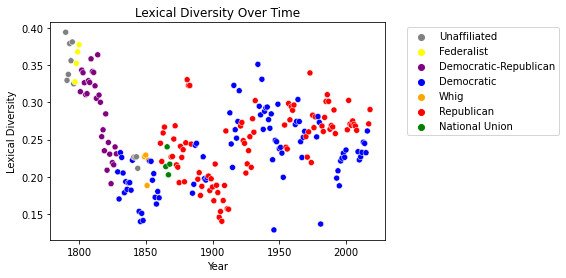

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


color_dict = {'Unaffiliated': 'gray', 'Federalist': 'yellow', 'Democratic-Republican':'purple',
       'Democratic':'blue', 'Whig':'orange', 'Republican':'red', 'National Union':'green'}

g = sns.scatterplot(x=df['year'], y=df['lex_div'], hue=df['party'],
              data=df, palette=color_dict, 
                   legend='full')
g.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Lexical Diversity')
plt.title('Lexical Diversity Over Time')

## Most Important Terms Based on TF-IDF Scores

After seeing the results from the Lexical Diversity, we want to know the top 5 words of each speech in order to get a sense of patterns throughout Presidents and over time. 

In [15]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
import numpy as np 
import pandas as pd 

def tfidf_vectorizer(corpus):
  cvect = CountVectorizer() 
  count_matrix = cvect.fit_transform(corpus) 
  tokens = cvect.get_feature_names() 

  count_matrix = pd.DataFrame(count_matrix.todense()) 

  df_vect = count_matrix.astype(bool).sum(axis=0) 
  df_vect = np.log(len(corpus) / df_vect) 
  print(tokens, np.array(count_matrix * df_vect))
  return tokens, np.array(count_matrix * df_vect) 

tokens, tfidf_matrix = tfidf_vectorizer(SOTUcorpus)
print(tfidf_matrix.shape)

idx_to_tokens = {}
tokens_to_idx = {}

for i in range(len(tokens)):
  token = tokens[i] 
  tokens_to_idx[token] = i 
  idx_to_tokens[i] = token 

['00', '000', '0000', '0001', '001', '002', '003', '004', '005', '006', '007', '008', '009', '01', '010', '011', '0111', '012', '013', '014', '015', '016', '017', '018', '019', '02', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '03', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '04', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '05', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '06', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '07', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '08', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '09', '090', '0900', '091', '092', '093', '094', '095', '096', '097', '098', '099', '10', '100', '1000', '100th', '101', '102', '103', '103rd', '104', '104th', '105', '105th', '106', '107', '108', '109', '10th', '11', '110', '110th', '111', '112', '112th', '113', '114', '1140', '115', '116'

In [16]:
for i in range(0,len(tfidf_matrix)):
  print("\n", df.file_name[i])
  bookarray = tfidf_matrix[i][:]
  idx = np.argsort(bookarray)
  idx = idx[::-1]
  for i in idx[0:5]:
    print("{}: {}".format(tokens[i], bookarray[i]))


 Washington_1790.txt
intimating: 5.429345628954441
licentiousness: 5.429345628954441
discern: 4.736198448394496
persuaded: 4.42093960817248
inviolable: 4.330733340286331

 Washington_1791.txt
subscriptions: 10.049712261823814
florins: 8.661466680572662
situations: 7.616921613174828
pleasing: 7.014909526788375
weights: 6.966870959798255

 Washington_1792.txt
chickamaugas: 10.858691257908882
symptoms: 5.8888779583328805
lieu: 5.728792542985809
impediments: 5.580576598678364
coins: 5.442590855704461

 Washington_1793.txt
warmest: 6.69980817454921
liberate: 6.464242103236443
recess: 5.8888779583328805
warlike: 5.442590855704461
indistinctly: 5.429345628954441

 Washington_1794.txt
pennsylvania: 15.708877809237714
militia: 14.039939382192914
inspector: 12.50704214384158
allegheny: 10.858691257908882
counties: 9.939626599152001

 Washington_1795.txt
violences: 9.472396896788991
tranquillity: 7.790723090232749
gentlemen: 7.611940417353118
indians: 7.508032009378659
agreeable: 5.7287925429858